In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf #configuration file for plotly


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [3]:
data = pd.read_csv("/home/nidhiyashwanth/Downloads/temp heroku/testing out for phase 2/Thyroid-Disease-Detection-main sana khan/Thyroid-Disease-Detection-main/detection-and-classification-of-hypothyroid/Complete Notebooks/hypothyroid.csv")
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
data.shape

(3772, 30)

In [5]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

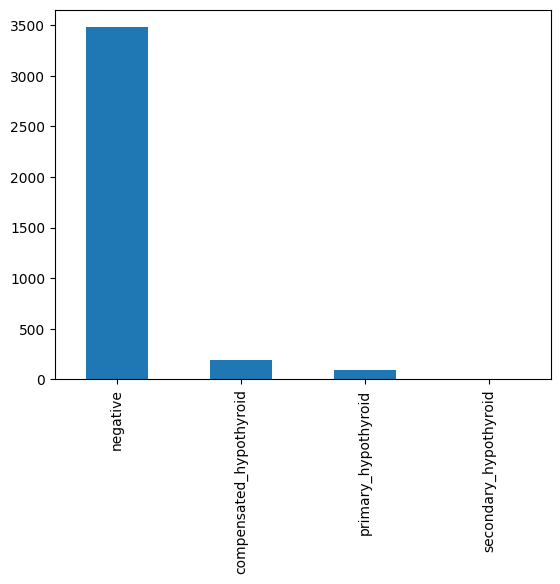

In [7]:
data["Class"].value_counts().plot(kind = "bar")
plt.show()

In [10]:
# replacing the '?' values with numpy nan

for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)

In [11]:
data["age"] = pd.to_numeric(data["age"])

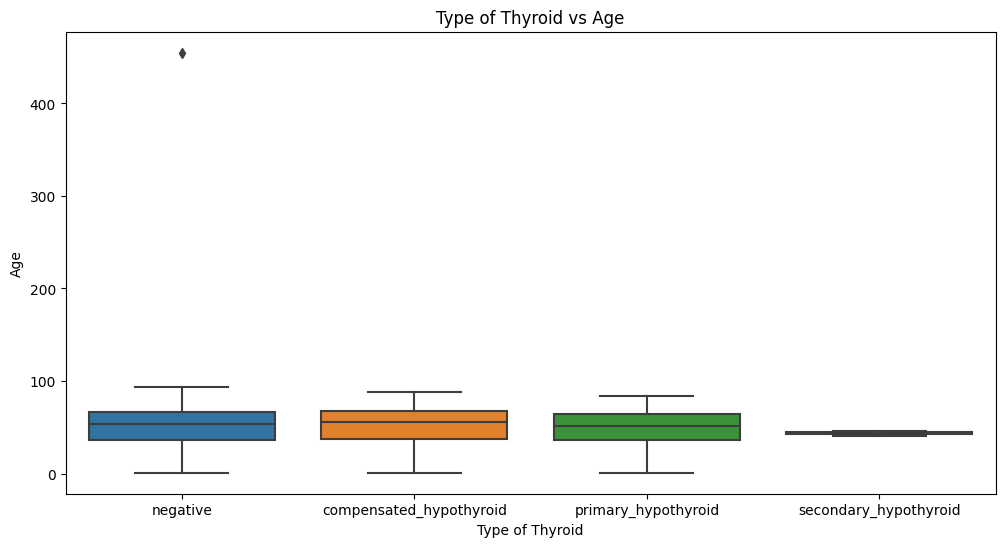

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "age", data = data)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

<AxesSubplot: >

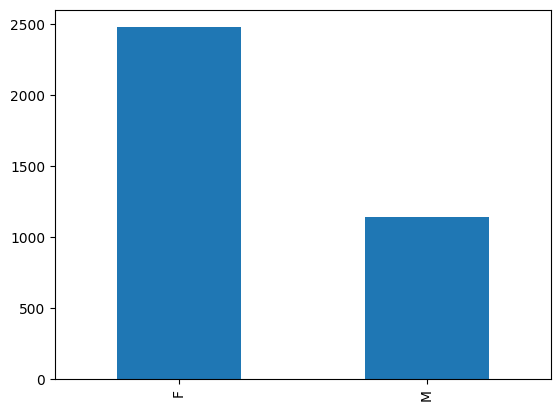

In [13]:
data["sex"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

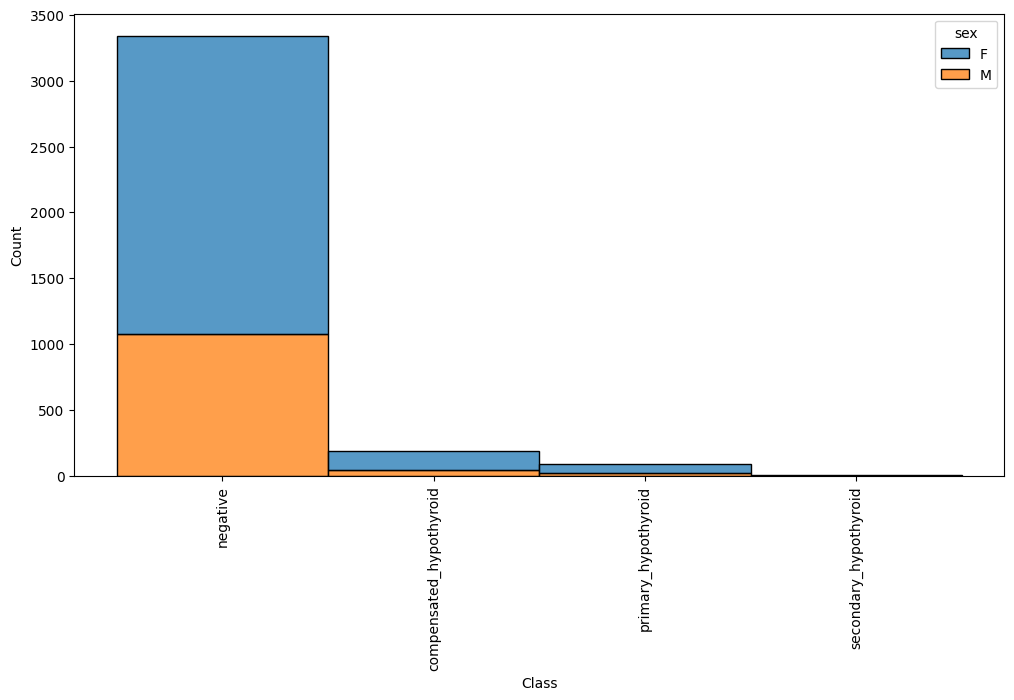

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot: >

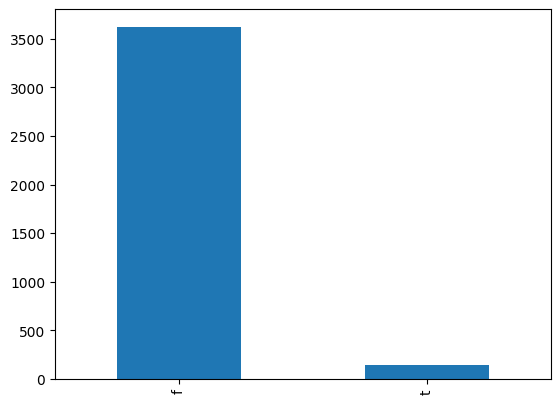

In [15]:
data["sick"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

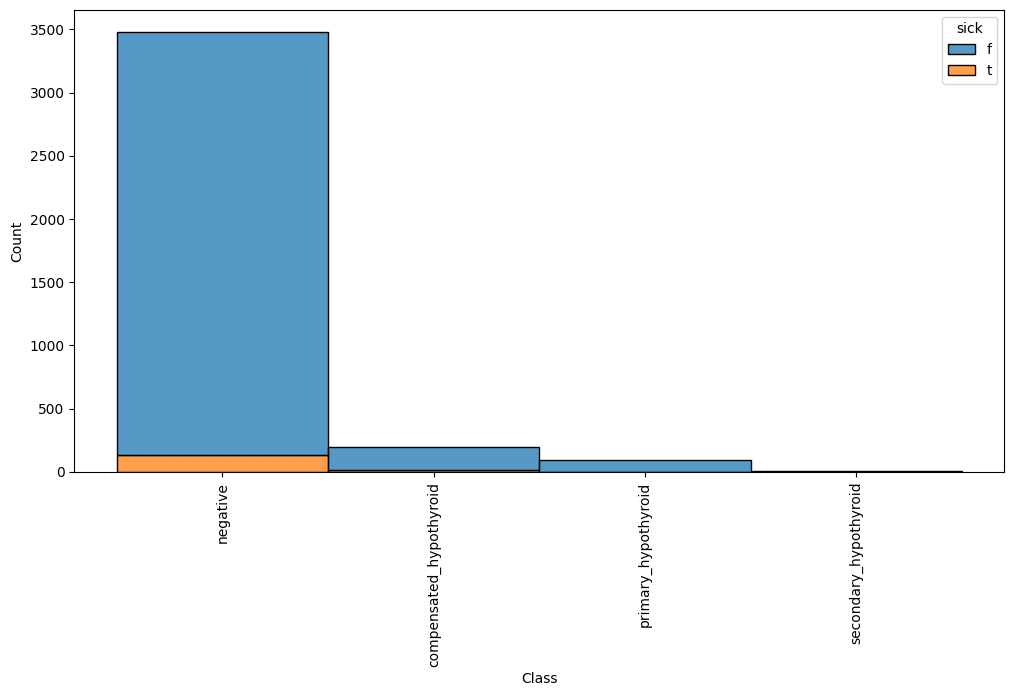

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot: >

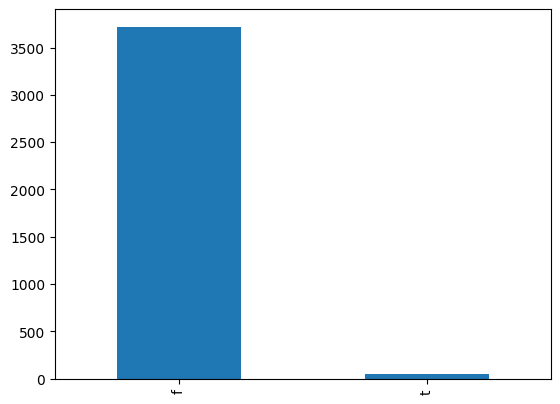

In [17]:
data["pregnant"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

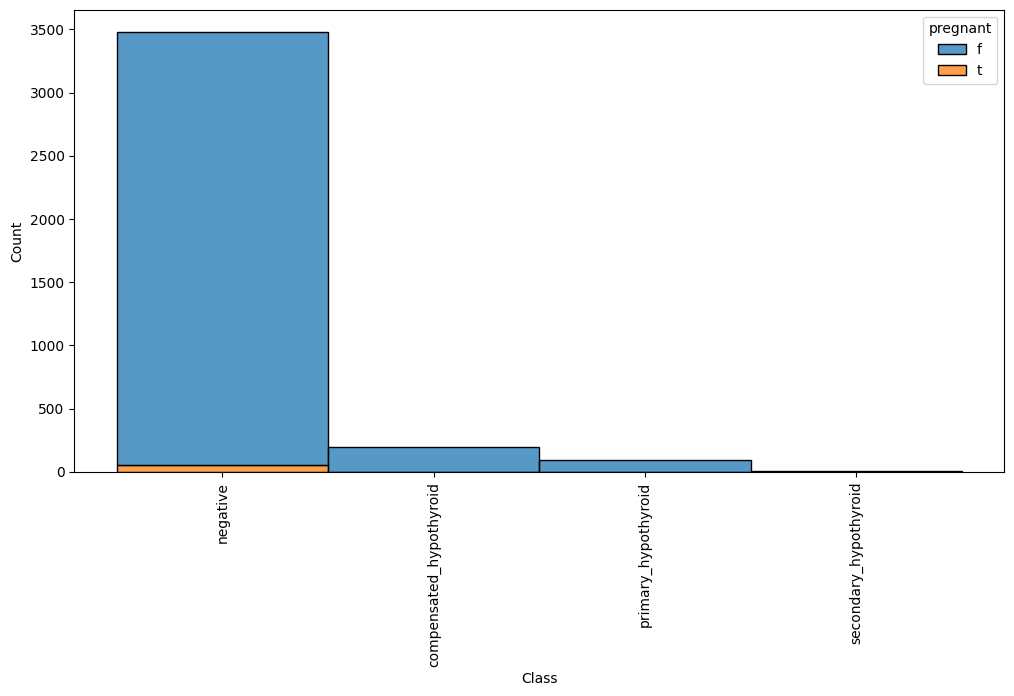

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot: >

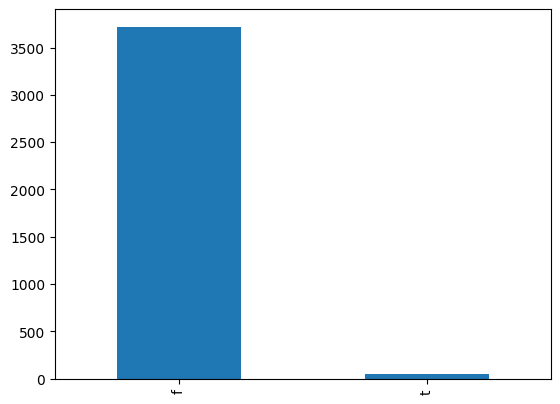

In [19]:
data["thyroid_surgery"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

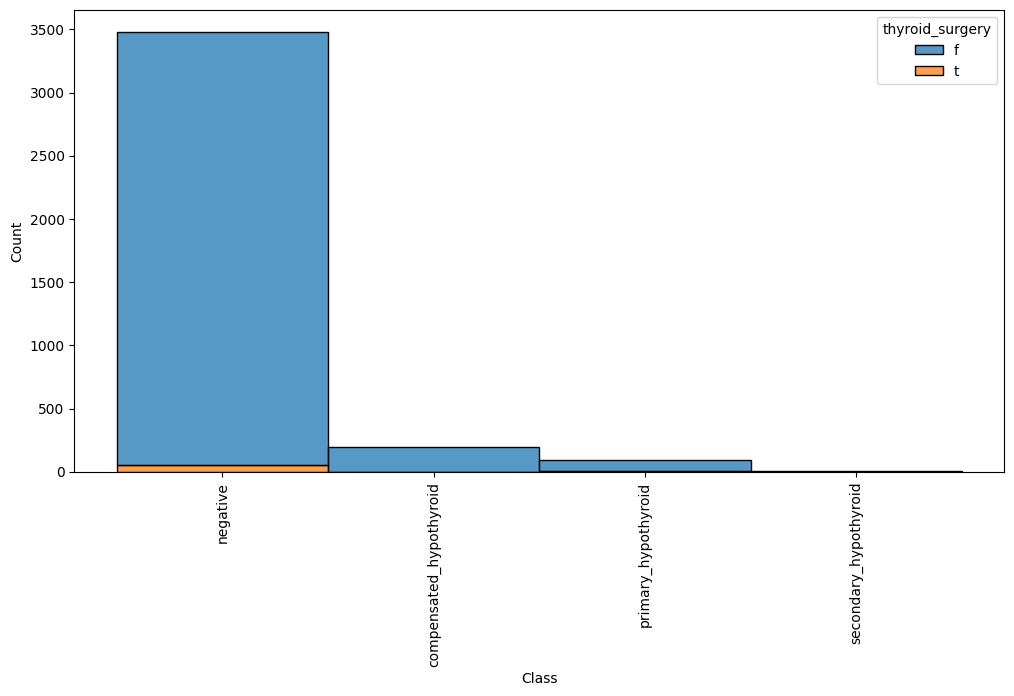

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="thyroid_surgery", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

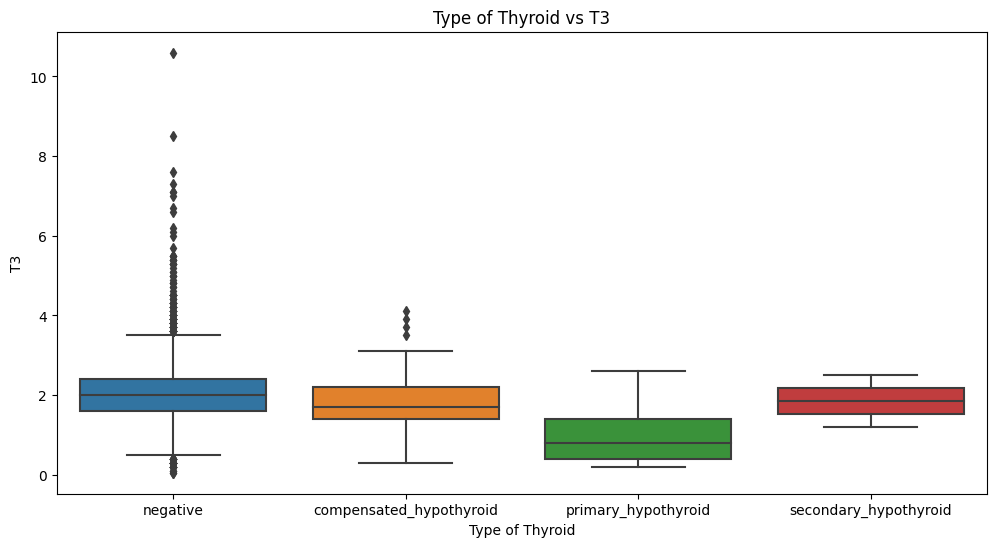

In [22]:
data['T3'] = pd.to_numeric(data['T3'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T3", data = data)
plt.title("Type of Thyroid vs T3")
plt.xlabel("Type of Thyroid")
plt.ylabel("T3")
plt.show()

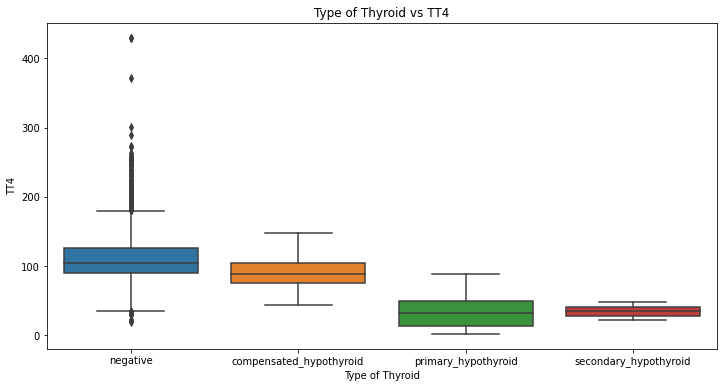

In [ ]:
data['TT4'] = pd.to_numeric(data['TT4'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TT4", data = data)
plt.title("Type of Thyroid vs TT4")
plt.xlabel("Type of Thyroid")
plt.ylabel("TT4")
plt.show()

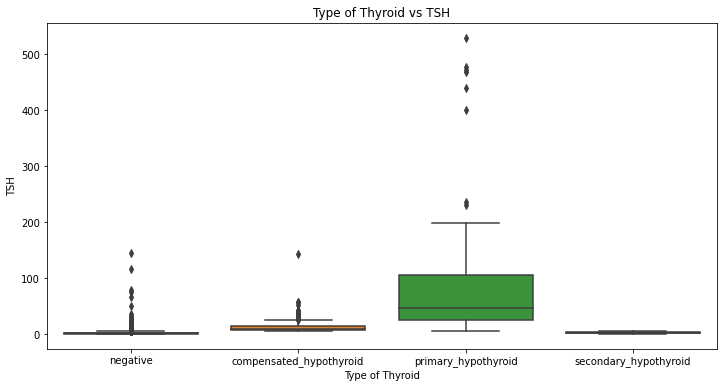

In [ ]:
data['TSH'] = pd.to_numeric(data['TSH'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TSH", data = data)
plt.title("Type of Thyroid vs TSH")
plt.xlabel("Type of Thyroid")
plt.ylabel("TSH")
plt.show()

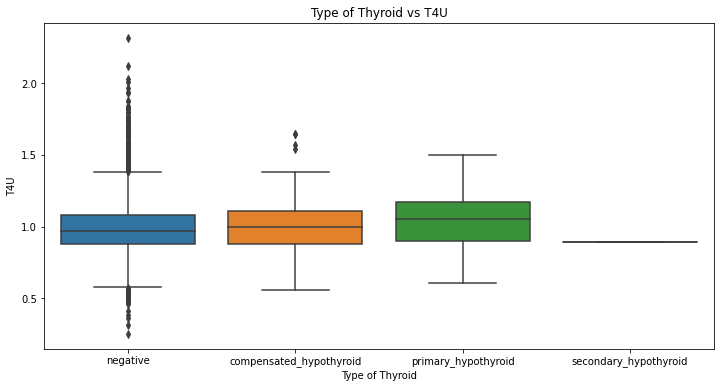

In [ ]:
data['T4U'] = pd.to_numeric(data['T4U'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T4U", data = data)
plt.title("Type of Thyroid vs T4U")
plt.xlabel("Type of Thyroid")
plt.ylabel("T4U")
plt.show()

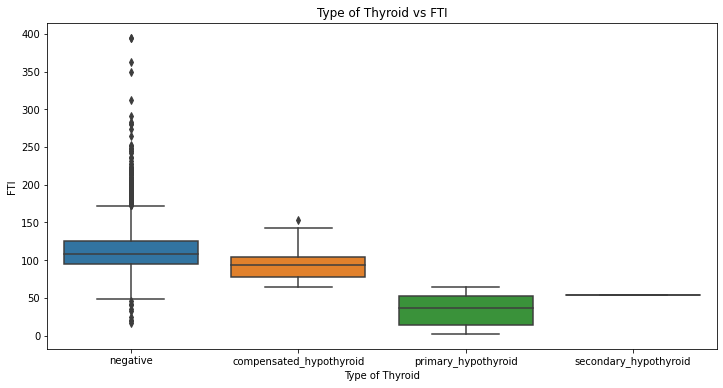

In [ ]:
data['FTI'] = pd.to_numeric(data['FTI'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "FTI", data = data)
plt.title("Type of Thyroid vs FTI")
plt.xlabel("Type of Thyroid")
plt.ylabel("FTI")
plt.show()

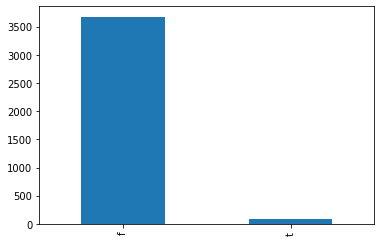

In [ ]:
data["tumor"].value_counts().plot(kind = "bar")

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

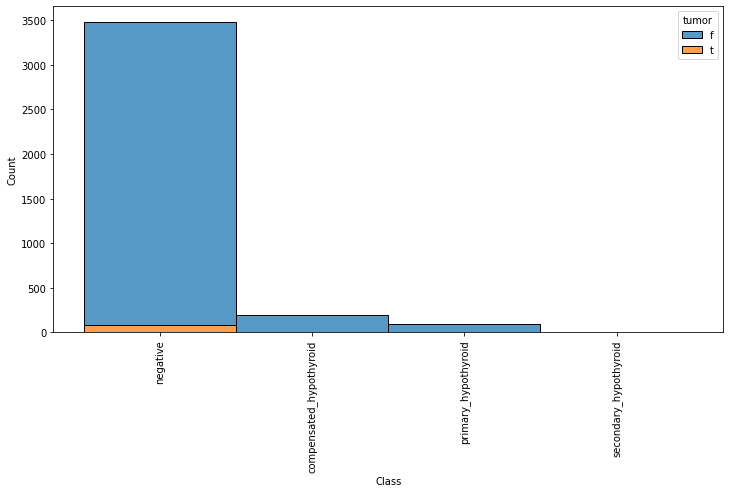

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="tumor", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

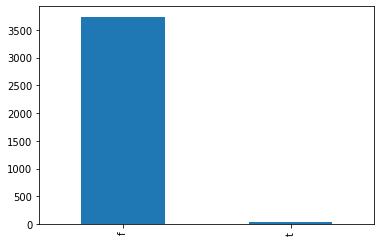

In [ ]:
data["goitre"].value_counts().plot(kind = "bar")

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

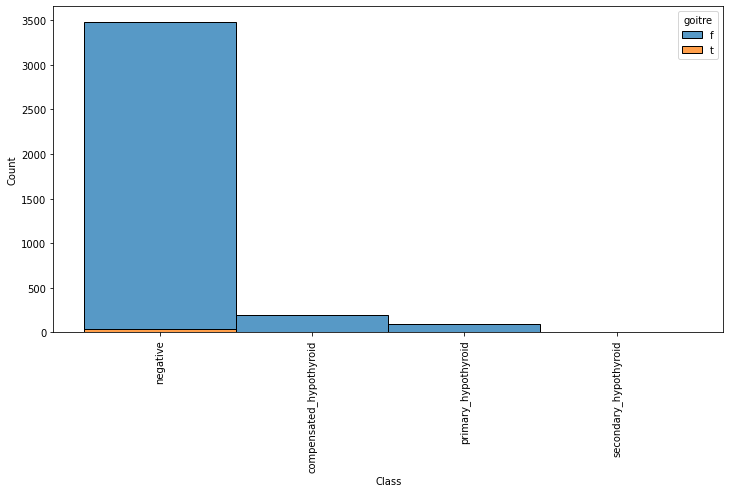

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="goitre", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

In [ ]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')